In [1]:
import pandas as pd 
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt


/home/david/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/david/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/david/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/david/anaconda3/lib/python3.7/site-packages/tensorboard/co

In [2]:
df=pd.read_csv("stokedata.csv")

df["date"]=pd.to_datetime(df["date"])

df2 =df[["date","volume"]].copy()
# fuller_test=adfuller(df2)

# fuller_test


df2.set_index("date",inplace=True)
df2.sort_index(inplace=True)

Vol = df2["volume"]

train_size=int(len(df2)*0.75)


train=df2.iloc[:train_size]
test=df2.iloc[train_size:].copy()


scaler=MinMaxScaler()
scaler.fit(train)
scaler_train=scaler.transform(train)
scaler_test=scaler.transform(test)


num_input=10
num_features=1

generator=TimeseriesGenerator(scaler_train,scaler_train,length=num_input,batch_size=1)



In [3]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# define model
model=Sequential()
model.add(LSTM(10, activation="relu",input_shape=(10,1)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

model.fit(generator,epochs=40)
model.summary()

Epoch 1/40
1835/1835 [==============================] - 11s 6ms/step - loss: 0.0065
Epoch 2/40
1835/1835 [==============================] - 11s 6ms/step - loss: 0.0064
Epoch 3/40
1835/1835 [==============================] - 11s 6ms/step - loss: 0.0064
Epoch 4/40
1835/1835 [==============================] - 12s 6ms/step - loss: 0.0064
Epoch 5/40
1835/1835 [==============================] - 12s 6ms/step - loss: 0.0064
Epoch 6/40
1835/1835 [==============================] - 11s 6ms/step - loss: 0.0064
Epoch 7/40
1835/1835 [==============================] - 12s 6ms/step - loss: 0.0063
Epoch 8/40
1835/1835 [==============================] - 12s 7ms/step - loss: 0.0064
Epoch 9/40
1835/1835 [==============================] - 12s 7ms/step - loss: 0.0064
Epoch 10/40
1835/1835 [==============================] - 12s 6ms/step - loss: 0.0064
Epoch 11/40
1835/1835 [==============================] - 13s 7ms/step - loss: 0.0063
Epoch 12/40
1835/1835 [==============================] - 15s 8ms/step - lo

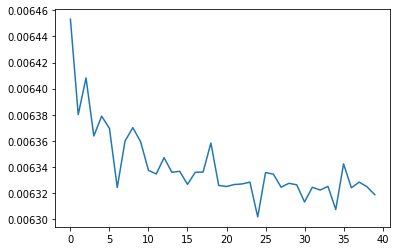

In [4]:
# view decrease in loss
loss_per_epoch= model.history.history["loss"]

plt.plot(range(len(loss_per_epoch)),loss_per_epoch)


In [5]:
import numpy as np
last_train_batch = scaler_train[-10:]
last_train_batch=last_train_batch.reshape((1,10,1))

prediction=model.predict(last_train_batch)
test_pred=[]

for x in range(len(scaler_test)):
#     get prediction value for the first batch
    prediction=model.predict(last_train_batch).flatten()
#     append the prediction value into the array
    test_pred.append(prediction)
#     use the prediction to update the batch and remove the first value
    last_train_batch=np.append(last_train_batch[:,1:,:],[[prediction]],axis=1)
    

true_pred=scaler.inverse_transform(test_pred) 


# 

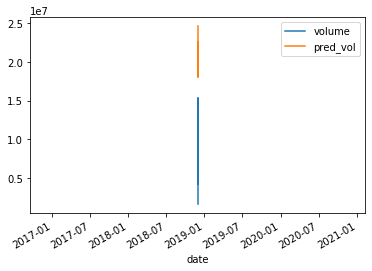

In [7]:

test.loc[:,"pred_vol"]=true_pred

#plt.plot(test[:10])
test[:10].plot()
